# Lab1. Linear Regression (with pure python)

## 1. Data Generation (Preparation)

Linear Regression 실습에 사용할 공부한 시간에 따른 성적 데이터를 만들어봅시다.

In [1]:
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

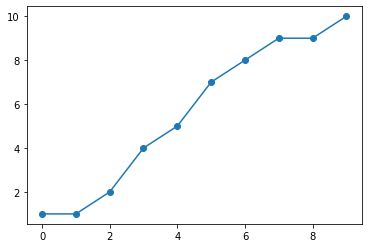

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y)
plt.show()

## 2. Hypothesis Define (Model Define)

Linear Regression 시에 활용하는 f(x) = Wx + b에서 b가 없는 간단한 버전인 f(x) = Wx 라는 모델(가설)을 구현해봅니다.


In [4]:
class H():
  
  def __init__(self, w):
    self.w = w

  def forward(self, x):
    return self.w * x

h = H(4)
pred_y = h.forward(5)

print(f"value of f(5): {pred_y}")
print(f"value of w: {h.w}")

value of f(5): 20
value of w: 4


## 3. Cost Function Define (Loss Function Define)

Regression Problem 에서의 Cost Function을 작성해봅시다.

In [7]:
def cost(h, X, Y):
  error = 0
  for i in range(len(X)):
    error += (h.forward(X[i]) - Y[i]) ** 2
  error = error / len(X)
  return error

h = H(4)
print('cost value when w = 4 :', cost(h, X, Y))

cost value when w = 4 : 222.2


### Cost Surface Visualization

위에서 w=4 인 경우에 대해서 cost를 확인해보았는데요. 이번엔 다양한 w에 따라서 cost 값이 어떻게 바뀌는지 확인해보겠습니다.
w = 1.25 정도 쯤에서 cost 값이 최소가 되는 듯한 양상을 보이네요


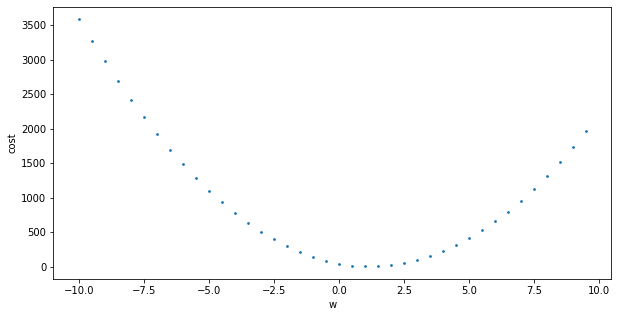

In [12]:
list_w = []
list_c = []
for i in range(-20, 20):
  w = i * 0.5
  h = H(w)
  c = cost(h, X, Y)
  list_w.append(w)
  list_c.append(c)

plt.figure(figsize=(10, 5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)
plt.show()

## Gradient Descent Algorithm

이제 특정 w 근방에서의 w에 대한 cost 의 편미분(지금은 변수가 하나라 그냥 미분과 다를바 없지만)을 구해보겠습니다.
여기서는 두가지 방식으로 그라디언트를 구해보겠습니다.
첫번째 방식은 수치해석적으로 w=4 인 지점과 w=4 + eps 인 지점에서의 cost 값을 각각 구한 뒤 두 값의 차이를 통해 그라이디언트를 구하는 방식입니다.
두번째 방식은 cost function을 w로 편미분한 공식을 통해 바로 특정 w 에서의 그라디언트를 구하는 방식입니다.


### Compare two approach in order to compute Gradient (Analytic, Formula)

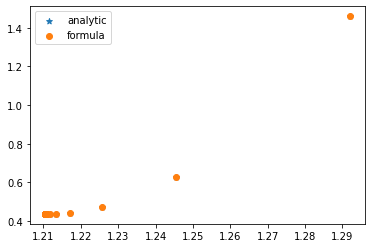

In [28]:
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, X, Y)
  eps = 0.00001
  h = H(w + eps)
  cost2 = cost(h, X, Y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1 + cost2) * 0.5

def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
  grad /= len(X)
  c = cost(h, X, Y)
  return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)
  
  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

  # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

3.8409714999999665